In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [4]:
train = pd.read_csv('Training Data.csv')
test = pd.read_csv('Test Data.csv')

In [3]:
train.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
for index, row in test.iterrows():
    test.loc[index, 'profession'] = test.loc[index, 'profession'].replace(' ', '_')
    test.loc[index, 'state'] = test.loc[index, 'state'].replace(' ', '_')
    test.loc[index, 'city'] = test.loc[index, 'city'].replace(' ', '_')
    
prof = train.profession.value_counts()
prof = prof.to_dict()
count = {}
for index, row in train.iterrows():
    job = train.loc[index, 'profession']
    if not job in count:
        count[job] = 0
    if train.loc[index, 'risk_flag'] == 1:
        count[job] += 1

count_norm = {}
for c in count:
    count_norm[c] = 0
    count_norm[c] = count[c]/prof[c]
print(count_norm)

{'Mechanical_engineer': 0.11155836687751582, 'Software_Developer': 0.1484266772214526, 'Technical_writer': 0.134167468719923, 'Civil_servant': 0.11579424427826875, 'Librarian': 0.11257562662057044, 'Economist': 0.09927837305926088, 'Flight_attendant': 0.12363494539781592, 'Architect': 0.13120034356882113, 'Designer': 0.10917790343627665, 'Physician': 0.11918751049185831, 'Financial_Analyst': 0.10315463518482679, 'Air_traffic_controller': 0.1353910244271918, 'Politician': 0.11225728155339806, 'Police_officer': 0.16405163853028798, 'Artist': 0.1226085167660975, 'Surveyor': 0.15146372507424694, 'Design_Engineer': 0.1069993656164094, 'Chemical_engineer': 0.11162343900096061, 'Hotel_Manager': 0.13538045577443028, 'Dentist': 0.109577582601422, 'Comedian': 0.11960448754516068, 'Biomedical_Engineer': 0.12755997659449972, 'Graphic_Designer': 0.11536972512582269, 'Computer_hardware_engineer': 0.12844378257632166, 'Petroleum_Engineer': 0.08510216226939099, 'Secretary': 0.13040901007705988, 'Compu

In [5]:
cities = train.city.unique()
city_prob = {}
for city in cities:
#     print(city)
    sub = train[train['city'] ==  city]
    if city not in city_prob:
        city_prob[city] = 0
    city_prob[city] = sub[sub.risk_flag == 1].shape[0] / sub[sub.risk_flag == 0].shape[0]

In [6]:
city_prob

{'Rewa': 0.1383737517831669,
 'Parbhani': 0.1395973154362416,
 'Alappuzha': 0.1505016722408027,
 'Bhubaneswar': 0.4841075794621027,
 'Tiruchirappalli[10]': 0.13783403656821377,
 'Jalgaon': 0.10723514211886305,
 'Tiruppur': 0.07751937984496124,
 'Jamnagar': 0.09390862944162437,
 'Kota[6]': 0.164021164021164,
 'Karimnagar': 0.09144542772861357,
 'Hajipur[31]': 0.14613778705636743,
 'Adoni': 0.12117647058823529,
 'Erode[17]': 0.11530398322851153,
 'Kollam': 0.15062111801242237,
 'Madurai': 0.13834586466165413,
 'Anantapuram[24]': 0.09110867178924259,
 'Kamarhati': 0.21473354231974923,
 'Bhusawal': 0.20477815699658702,
 'Sirsa': 0.12738853503184713,
 'Amaravati': 0.06870229007633588,
 'Secunderabad': 0.14392523364485982,
 'Ahmedabad': 0.25775193798449614,
 'Ajmer': 0.16106442577030813,
 'Ongole': 0.11962224554039874,
 'Miryalaguda': 0.17318435754189945,
 'Ambattur': 0.13675213675213677,
 'Indore': 0.23093681917211328,
 'Pondicherry': 0.09791921664626684,
 'Shimoga': 0.07510431154381085,
 '

In [7]:
def add_feats(df_train, df_test):

    for index, row in df_train.iterrows():
        df_train.loc[index, 'prof_prob'] = count_norm[df_train.loc[index, 'profession']]
        df_train.loc[index, 'city_prob'] = city_prob[df_train.loc[index, 'city']]
    for index, row in df_test.iterrows():
        df_test.loc[index, 'prof_prob'] = count_norm[df_test.loc[index, 'profession']]
        df_test.loc[index, 'city_prob'] = city_prob[df_test.loc[index, 'city']]
    
    return df_train, df_test
    
train, test = add_feats(train, test)

In [8]:
train.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag,prof_prob,city_prob
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0.111558,0.138374
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,0.148427,0.139597
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,0.134167,0.150502
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,0.148427,0.484108
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,0.115794,0.137834


In [15]:
def clean(df_train, df_test):
    d1 = {'single': 0, 'married':1}
    df_train = df_train.replace({'married': d1})
    d1 = {'single': 0, 'married':1}
    df_test = df_test.replace({'married': d1})
    
    d1 = {'rented':0, 'owned':1, 'norent_noown':2}
    df_train = df_train.replace({'house_ownership': d1})
    d1 = {'rented':0, 'owned':1, 'norent_noown':2}
    df_test = df_test.replace({'house_ownership': d1})
    
    d1 = {'no': 0, 'yes':1}
    df_train = df_train.replace({'car_ownership': d1})
    d1 = {'no': 0, 'yes':1}
    df_test = df_test.replace({'car_ownership': d1})
        
        
     
    
    le = LabelEncoder()
    prof_types = df_train.profession.unique().tolist()

    for p in df_test.profession.unique():
        if p not in prof_types:
            print(p)
            prof_types.append(p)
    le.fit(prof_types)
    df_train['profession'] = le.transform(df_train['profession'])
    df_test['profession'] = le.transform(df_test['profession'])
    
#     le1 = LabelEncoder()
#     cities = df_train.city.unique().tolist()

#     for p in df_test.city.unique():
#         if p not in cities:
#             print(p)
#             cities.append(p)
    
#     le1.fit(cities)
#     df_train['city'] = le1.transform(df_train['city'])   
#     df_test['city'] = le1.transform(df_test['city'])
    
    le2 = LabelEncoder()
    
    states = df_train.state.unique().tolist()

    for p in df_test.state.unique():
        if p not in states:
            print(p)
            states.append(p)
    
    le2.fit(states)
        
    df_train['state'] = le2.transform(df_train['state'])
    df_test['state'] = le2.transform(df_test['state'])
#     df_test['state'] = le2.transform(df_test['state'])

    ss = StandardScaler()
#     ss.fit(df_train[['income', 'city']])
#     df_train[['income', 'city']] = ss.transform(df_train[['income', 'city']])
#     df_test[['income', 'city']] = ss.transform(df_test[['income', 'city']])
#     ss.fit(df_train[['income', 'age', 'experience', 'married', 'house_ownership',
#        'car_ownership', 'profession', 'city', 'state', 'current_job_years',
#        'current_house_years', 'prob']])
#     df_train[['income', 'age', 'experience', 'married', 'house_ownership',
#        'car_ownership', 'profession', 'city', 'state', 'current_job_years',
#        'current_house_years', 'prob']] = ss.transform(df_train[['income', 'age', 'experience', 'married', 'house_ownership',
#        'car_ownership', 'profession', 'city', 'state', 'current_job_years',
#        'current_house_years', 'prob']])
#     df_test[['income', 'age', 'experience', 'married', 'house_ownership',
#        'car_ownership', 'profession', 'city', 'state', 'current_job_years',
#        'current_house_years', 'prob']] = ss.transform(df_test[['income', 'age', 'experience', 'married', 'house_ownership',
#        'car_ownership', 'profession', 'city', 'state', 'current_job_years',
#        'current_house_years', 'prob']])

    ss.fit(df_train[['income']])
    df_train[['income']] = ss.transform(df_train[['income']])
    df_test[['income']] = ss.transform(df_test[['income']])
    
    
    return df_train, df_test

In [16]:
train_, test_ = clean(train, test)

In [18]:
train_.to_csv('training.csv', index = False)
test_.to_csv('testing.csv', index = False)

In [7]:
states = train.state.unique()
state_prob = {}
for state in states:
#     print(city)
    sub = train[train['state'] ==  state]
    if state not in state_prob:
        state_prob[state] = 0
    if sub[sub.risk_flag == 0].shape[0] == 0:
        print(state)
        continue
    state_prob[state] = sub[sub.risk_flag == 1].shape[0] / sub[sub.risk_flag == 0].shape[0]

In [8]:
state_prob

{'Madhya_Pradesh': 0.18254898676938536,
 'Maharashtra': 0.1277187100189703,
 'Kerala': 0.20062047569803515,
 'Odisha': 0.16624937406109164,
 'Tamil_Nadu': 0.1150293304564763,
 'Gujarat': 0.1334326875310482,
 'Rajasthan': 0.1639177873636133,
 'Telangana': 0.1495798319327731,
 'Bihar': 0.15020061638657906,
 'Andhra_Pradesh': 0.1312494410160093,
 'West_Bengal': 0.1469668848295399,
 'Haryana': 0.14182344428364688,
 'Puducherry': 0.13191153238546605,
 'Karnataka': 0.11147571723232702,
 'Uttar_Pradesh': 0.13341581194875685,
 'Himachal_Pradesh': 0.15373961218836565,
 'Punjab': 0.0989522700814901,
 'Tripura': 0.20208023774145617,
 'Uttarakhand': 0.07639287765651924,
 'Jharkhand': 0.1537966537966538,
 'Mizoram': 0.12450331125827814,
 'Assam': 0.15166340508806261,
 'Jammu_and_Kashmir': 0.18904475617902472,
 'Delhi': 0.11676159479251425,
 'Chhattisgarh': 0.15377670779416192,
 'Chandigarh': 0.10252100840336134,
 'Uttar_Pradesh[5]': 0.15015479876160992,
 'Manipur': 0.2747747747747748,
 'Sikkim': 0.

In [9]:
train_ = pd.read_csv('training.csv')
test_ = pd.read_csv('testing.csv')

In [10]:
train_.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag,prof_prob,city_prob
0,1,-1.283145,23,3,0,0,0,33,Rewa,13,3,13,0,0.111558,0.138374
1,2,0.895457,40,10,0,0,0,43,Parbhani,14,9,13,0,0.148427,0.139597
2,3,-0.349269,66,4,1,0,0,47,Alappuzha,12,4,10,0,0.134167,0.150502
3,4,0.437526,41,2,0,0,1,43,Bhubaneswar,17,2,12,1,0.148427,0.484108
4,5,0.268128,47,11,0,0,0,11,Tiruchirappalli[10],22,3,14,1,0.115794,0.137834


In [15]:
def modify_state(df_train, df_test):
#     for index, row in test.iterrows():
        
    for index, row in df_train.iterrows():
        df_train.loc[index, 'state_prob'] = state_prob[df_train.loc[index, 'state']]
    for index, row in df_test.iterrows():
        test.loc[index, 'state'] = test.loc[index, 'state'].replace(' ', '_')
        df_test.loc[index, 'state_prob'] = state_prob[df_test.loc[index, 'state']]
    return df_train, df_test
train, test = modify_state(train, test)

In [19]:
for s in train.state.unique():
    if s not in test.state.unique():
        print(s)

In [22]:
train_['state_prob'] = train['state_prob']

In [24]:
train_.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag,prof_prob,city_prob,state_prob
0,1,-1.283145,23,3,0,0,0,33,Rewa,13,3,13,0,0.111558,0.138374,0.182549
1,2,0.895457,40,10,0,0,0,43,Parbhani,14,9,13,0,0.148427,0.139597,0.127719
2,3,-0.349269,66,4,1,0,0,47,Alappuzha,12,4,10,0,0.134167,0.150502,0.200620
3,4,0.437526,41,2,0,0,1,43,Bhubaneswar,17,2,12,1,0.148427,0.484108,0.166249
4,5,0.268128,47,11,0,0,0,11,Tiruchirappalli[10],22,3,14,1,0.115794,0.137834,0.115029


In [25]:
test_['state_prob'] = test['state_prob']

In [26]:
test_.head()

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,prof_prob,city_prob,state_prob
0,1,0.832425,59,19,0,0,0,26,Malda,28,4,13,0.144264,0.126478,0.146967
1,2,-1.314007,25,5,0,0,0,24,Jalna,14,5,10,0.135789,0.121641,0.127719
2,3,1.356432,50,12,0,0,0,30,Thane,14,9,14,0.129514,0.078453,0.127719
3,4,-1.060588,49,9,1,0,1,1,Latur,14,3,12,0.121465,0.041293,0.127719
4,5,-1.731466,25,18,0,0,1,12,Berhampore,28,13,11,0.119604,0.173848,0.146967


In [27]:
train_.to_csv('training.csv', index = False)
test_.to_csv('testing.csv', index = False)

<AxesSubplot:>

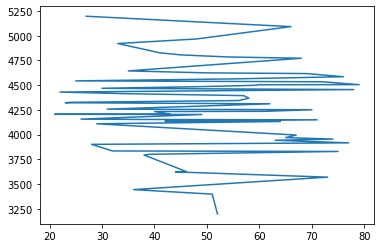

In [9]:
# age group
l = train.age.value_counts()
l.plot()

In [ ]:
# 20-29, 30-39, 40-49, 50-59, 60-69, 70-79 

In [18]:
for index, row in train.iterrows():
    if train.loc[index, 'age'] >=20 and train.loc[index, 'age'] <= 29:
        train.loc[index, 'age_group'] = 0
    elif train.loc[index, 'age'] >= 30 and train.loc[index, 'age'] <= 39:
        train.loc[index, 'age_group'] = 1
    elif train.loc[index, 'age'] >= 40 and train.loc[index, 'age'] <= 49:
        train.loc[index, 'age_group'] = 2
    elif train.loc[index, 'age'] >=50 and train.loc[index, 'age'] <= 59:
        train.loc[index, 'age_group'] = 3
    elif train.loc[index, 'age'] >=60 and train.loc[index, 'age'] <= 69:
        train.loc[index, 'age_group'] = 4
    elif train.loc[index, 'age'] >=70 and train.loc[index, 'age'] <= 79:
        train.loc[index, 'age_group'] = 5

In [20]:
for index, row in test.iterrows():
    if test.loc[index, 'age'] >=20 and test.loc[index, 'age'] <= 29:
        test.loc[index, 'age_group'] = 0
    elif test.loc[index, 'age'] >= 30 and test.loc[index, 'age'] <= 39:
        test.loc[index, 'age_group'] = 1
    elif test.loc[index, 'age'] >= 40 and test.loc[index, 'age'] <= 49:
        test.loc[index, 'age_group'] = 2
    elif test.loc[index, 'age'] >=50 and test.loc[index, 'age'] <= 59:
        test.loc[index, 'age_group'] = 3
    elif test.loc[index, 'age'] >=60 and test.loc[index, 'age'] <= 69:
        test.loc[index, 'age_group'] = 4
    elif test.loc[index, 'age'] >=70 and test.loc[index, 'age'] <= 79:
        test.loc[index, 'age_group'] = 5

In [2]:
train_ = pd.read_csv('training.csv')
test_ = pd.read_csv('testing.csv')

In [23]:
train_['age_group'] = train['age_group']
test_['age_group'] = test['age_group']

In [3]:
train_.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag,prof_prob,city_prob,state_prob,age_group
0,1,-1.283145,23,3,0,0,0,33,Rewa,13,3,13,0,0.111558,0.138374,0.182549,0.0
1,2,0.895457,40,10,0,0,0,43,Parbhani,14,9,13,0,0.148427,0.139597,0.127719,2.0
2,3,-0.349269,66,4,1,0,0,47,Alappuzha,12,4,10,0,0.134167,0.150502,0.200620,4.0
3,4,0.437526,41,2,0,0,1,43,Bhubaneswar,17,2,12,1,0.148427,0.484108,0.166249,2.0
4,5,0.268128,47,11,0,0,0,11,Tiruchirappalli[10],22,3,14,1,0.115794,0.137834,0.115029,2.0


In [25]:
test_.head()

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,prof_prob,city_prob,state_prob,age_group
0,1,0.832425,59,19,0,0,0,26,Malda,28,4,13,0.144264,0.126478,0.146967,3.0
1,2,-1.314007,25,5,0,0,0,24,Jalna,14,5,10,0.135789,0.121641,0.127719,0.0
2,3,1.356432,50,12,0,0,0,30,Thane,14,9,14,0.129514,0.078453,0.127719,3.0
3,4,-1.060588,49,9,1,0,1,1,Latur,14,3,12,0.121465,0.041293,0.127719,2.0
4,5,-1.731466,25,18,0,0,1,12,Berhampore,28,13,11,0.119604,0.173848,0.146967,0.0


In [26]:
train_.to_csv('training.csv', index = False)
test_.to_csv('testing.csv', index = False)

<AxesSubplot:>

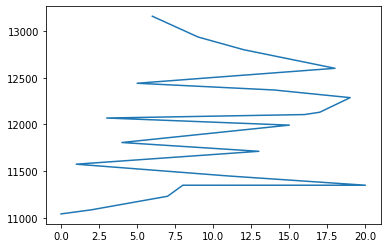

In [5]:
l = train.experience.value_counts()
l.plot()